# Introduction

In this experiment we will be trying to do convolution operation on various signals and using
both methods of linear convolution and circular convolution.In the theory class we have ana-
lyzed the advantages of using circular convolution over using linear convolution when we are
recieving continuos samples of inputs.We will also be analysing the effect of passing the signal
x = cos(0.2 ∗ pi ∗ n) + cos(0.85 ∗ pi ∗ n) through a given filter.At last we will be analysing the cross-
correllation output of the Zadoff–Chu sequence.

# Importing packages

In [1]:
import numpy as np
import csv
from scipy import signal
import matplotlib.pyplot as plt
from math import *
import pandas as pd

# Filter sequence

Now we will use the signal.freqz function to visuaize the filter in frequency domain.

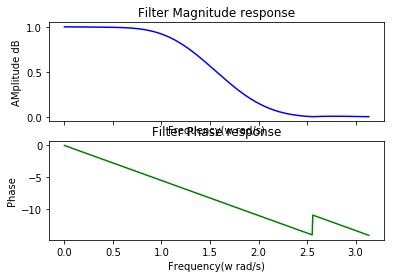

In [2]:
a = np.genfromtxt('h.csv',delimiter=',')
w,h = signal.freqz(a)
fig,ax = plt.subplots(2,sharex=True)
plt.grid(True,which="all")
ax[0].plot(w,(abs(h)),"b")
ax[0].set_title("Filter Magnitude response")
ax[0].set_xlabel("Frequency(w rad/s)")
ax[0].set_ylabel("AMplitude dB")
angle = np.unwrap(np.angle(h))
ax[1].plot(w,angle,"g")
ax[1].set_title("Filter Phase response")
ax[1].set_xlabel("Frequency(w rad/s)")
ax[1].set_ylabel("Phase")
plt.show()

Here I have plotted both the magnitude and phase response of the filter in the appropriate
frequency range. It is clear from the plot that the given filter is a low-pass filter with a cutoff
frequency of about 0.75 rad/s.

# Given Signal:

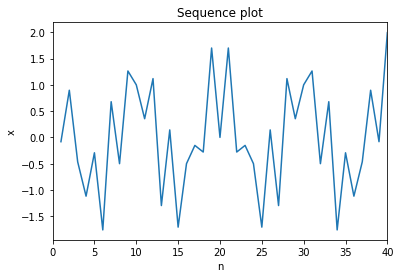

In [3]:
n = np.linspace(1,2**10,2**10)
x = np.cos(0.2*pi*n) + np.cos(0.85*pi*n)
fig2,bx = plt.subplots(1,sharex=True)
bx.plot(n,x)
bx.set_title("Sequence plot")
bx.set_xlabel("n")
bx.set_ylabel("x")
bx.set_xlim(0,40)
plt.show()

Clearly the input seqence has frequency components of 0.2pi = 0.628 rad/s and 0.85pi = 2.669
rad/s.

# Passing signal through Filter

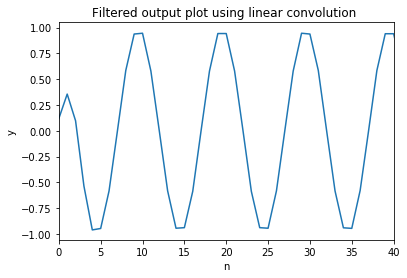

In [4]:
y = np.convolve(x,a,mode="same")
fig3,cx = plt.subplots(1,sharex=True)
cx.plot(y)
cx.set_title("Filtered output plot using linear convolution ")
cx.set_xlabel("n")
cx.set_ylabel("y")
cx.set_xlim(0,40)
plt.show()

We can clearly see that it acted as a low pass filter

# Using Circular Convolution

/home/suhas/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


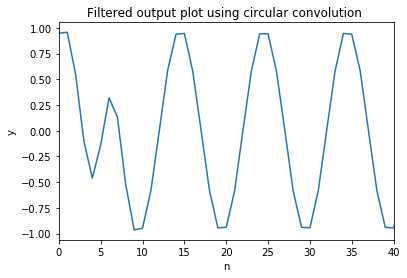

In [5]:
a_adjusted = np.pad(a,(0,len(x)-len(a)),"constant")
y1 = np.fft.ifft(np.fft.fft(x) * np.fft.fft(a_adjusted))
fig4,dx = plt.subplots(1,sharex=True)
dx.plot(y1)
dx.set_title("Filtered output plot using circular convolution ")
dx.set_xlabel("n")
dx.set_ylabel("y")
dx.set_xlim(0,40)
plt.show()


norder to compute the output using circular-convolution I am imitially padding my signals in
to avoid overlapping of the output over itself.By doing this we will be getting the output seqence
just like linear convolution.

# Circular Convolution using linear stiching

/home/suhas/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


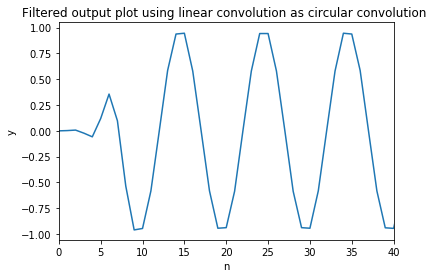

In [6]:
N = len(a) + len(x) - 1
fil = np.concatenate([a,np.zeros(N-len(a))])
y_modified = np.concatenate([x,np.zeros(N-len(x))])
y2 = np.fft.ifft(np.fft.fft(y_modified) * np.fft.fft(fil))
fig5,fx = plt.subplots(1,sharex=True)
fx.plot(y2)
fx.set_title("Filtered output plot using linear convolution as circular convolution ")
fx.set_xlabel("n")
fx.set_ylabel("y")
fx.set_xlim(0,40)
plt.show()


We clearly see that the output is exactly similar to the one which we got by linear convolu-
tion.Hence it is seen that by padding the sequence appropriately we will be able to achieve the
output using circular convolution.

# Zadoff Sequence

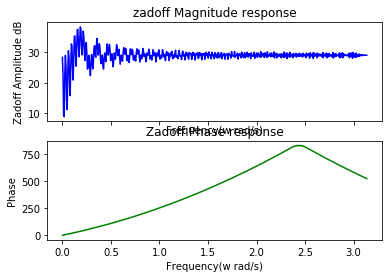

In [7]:
zadoff = pd.read_csv("x1.csv").values[:,0]
zadoff = np.array([complex(zadoff[i].replace("i","j")) for i in range(len(zadoff))])
zw,zh = signal.freqz(zadoff)
fig5,ex = plt.subplots(2,sharex=True)
plt.grid(True,which="all")
ex[0].plot(zw,(abs(zh)),"b")
ex[0].set_title("zadoff Magnitude response")
ex[0].set_xlabel("Frequency(w rad/s)")
ex[0].set_ylabel("Zadoff Amplitude dB")
angle_z = np.unwrap(np.angle(zh))
ex[1].plot(zw,angle_z,"g")
ex[1].set_title("Zadoff Phase response")
ex[1].set_xlabel("Frequency(w rad/s)")
ex[1].set_ylabel("Phase")
plt.show()

Properties of Zadoff-Chu sequence:
$(a) It is a complex sequence.$
$(b) It is a constant amplitude sequence.$
$(c) The auto correlation of a Zadoff–Chu sequence with a cyclically shifted version
of itself is zero.$
$(d) Correlation of Zadoff–Chu sequence with the delayed version of itself will give
a peak at that delay.$

# Co-relation with shifting with itself

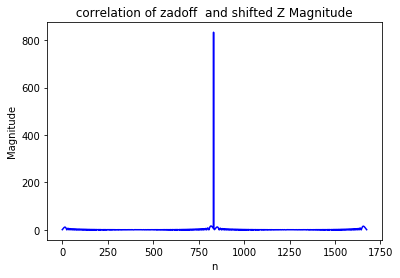

In [10]:
zadoff_modified = np.concatenate([zadoff[-5:],zadoff[:-5]])

z_out = np.correlate(zadoff,zadoff_modified,"full")
fig7,gx = plt.subplots(1,sharex=True)
plt.grid(True,which="all")
gx.plot((abs(z_out)),"b")
gx.set_title(" correlation of zadoff  and shifted Z Magnitude ")
gx.set_xlabel("n")
gx.set_ylabel("Magnitude")
plt.show()

We clearly see a peak at shited magnitude frequency correspondent

# Conclusion
Hence through this assignment we are able to take the output of a system for a given signal
using convolution. We approached convolution using linear method and circular method.We use
padding to make the filter of appropriate size before we do the circular convolution.Later we
analysed the crosscorrelation function of Zadoff–Chu sequence with its circularly shifted version
of itself.We observe a sharp peak in appropriate location according to the circular shift done.

